<a href="https://colab.research.google.com/github/dikshabhati1/The-Sparks-Foundation-Tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BY DIKSHA BHATI**

# **Task 3: For the given 'Iris' dataset create the Decision Tree Classifier and visualize it graphically**

In [1]:
# import libraries
from google.colab import files
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
# load dataset in google colab
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [4]:
# read csv file
data_df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

# first 5 rows of data set
data_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**We do not need 'Id' column so we can drop it**

In [5]:
# drop Id column
data_df.drop('Id',axis=1,inplace=True)

In [6]:
# dataset after dropping Id column
data_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# basic info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# shape of data set
print("Rows in data set are" , data_df.shape[0], "and Columns in data set are", data_df.shape[1])

Rows in data set are 150 and Columns in data set are 5


In [9]:
# null values
data_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**We do not have null value in dataset**

In [10]:
# basic statistical details
data_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [86]:
# count for each unique species
data_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

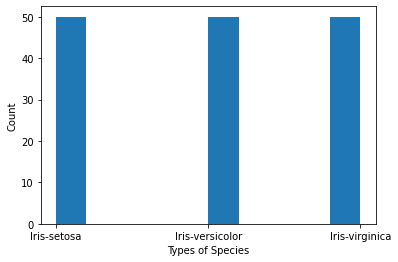

In [36]:
# plot histogram for each unique Species
plt.hist(data_df['Species'])
plt.xlabel('Types of Species')
plt.ylabel('Count')
plt.show()

**We have equal number of species in each category**

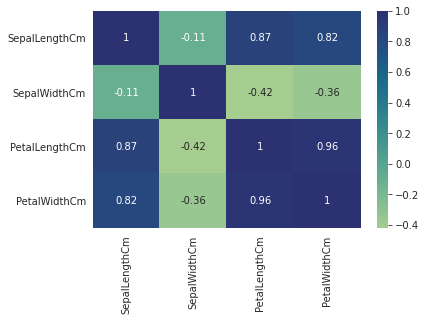

In [87]:
# heatmap
# correlation
sns.heatmap(data_df.corr(),annot=True,cmap='crest')

**We can see that Petal length and Petal width are highly positive correlated to each other, so we can drop the column but we have only few columns so we are not dropping it**

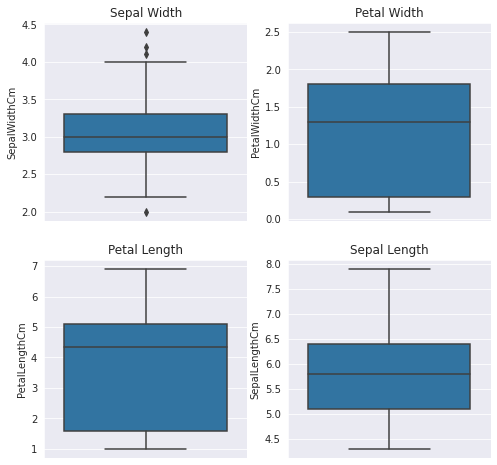

In [88]:
#box plot
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
bp=sns.boxplot(y=data_df.SepalWidthCm,ax=ax[0, 0])
ax[0, 0].set_title('Sepal Width')
bp=sns.boxplot(y=data_df.PetalWidthCm,ax=ax[0, 1])
ax[0,1].set_title('Petal Width')
bp=sns.boxplot(y=data_df.PetalLengthCm,ax=ax[1, 0])
ax[1,0].set_title('Petal Length')
bp=sns.boxplot(y=data_df.SepalLengthCm,ax=ax[1, 1])
ax[1, 1].set_title('Sepal Length')
plt.show()

**We can see from the boxplot that we have outliers in sepal width column but we are not dropping it because we have a small dataset**

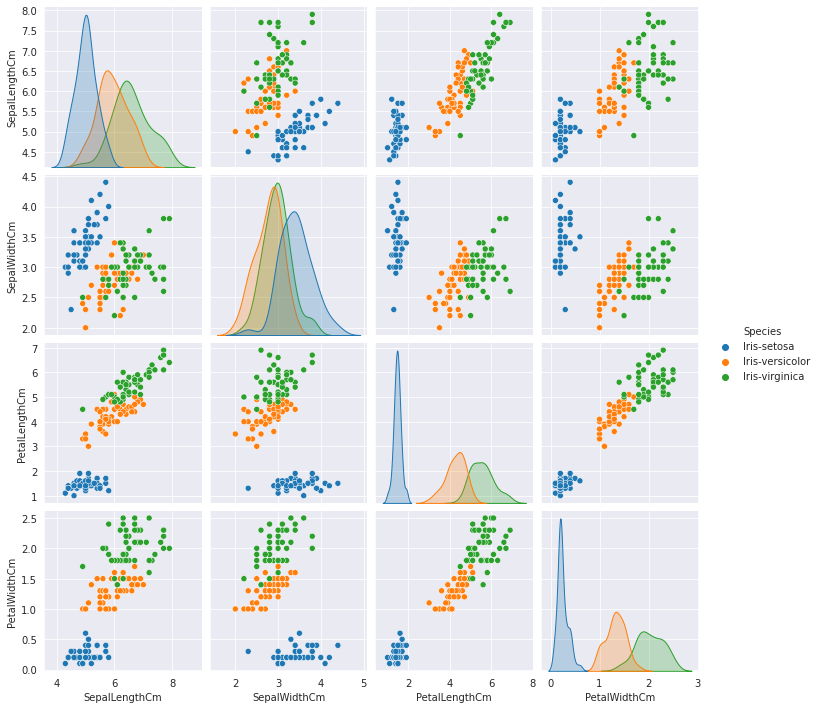

In [89]:
# pairplot
sns.set_style('darkgrid')
sns.pairplot(data_df,hue='Species',kind='scatter')

In [11]:
#preparing data
X=data_df.drop('Species',axis=1)
y=data_df['Species']

In [28]:
# splitting data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
# model training
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
#predictions
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [32]:
# score
s=model.score(X_test,y_test)
print('Accuracy Score is',s)

Accuracy Score is 1.0


In [33]:
my_tree=DecisionTreeClassifier().fit(X,y)

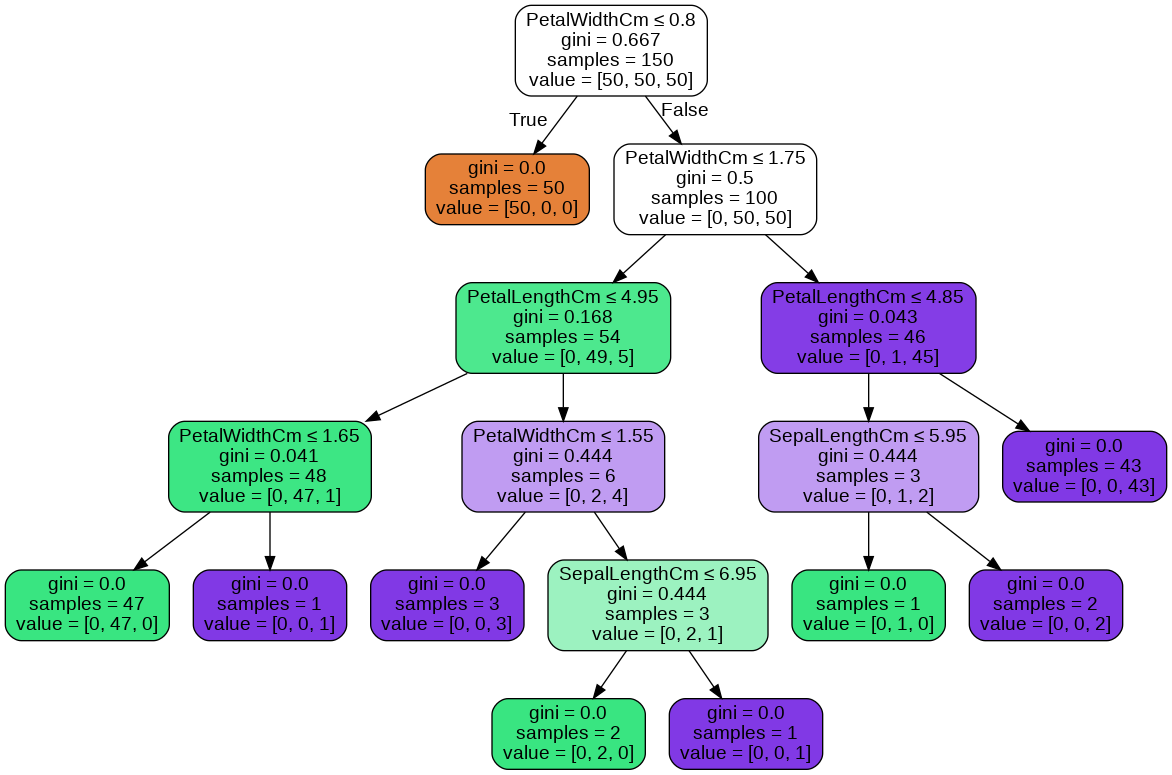

In [34]:
feature_name=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

# decision tree graph
dot_data = StringIO()
export_graphviz(my_tree, out_file = dot_data, feature_names=feature_name,  
                filled = True,rounded =True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())